## Библиотеки

In [1]:
import os
import random
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from dataset import indexing
from dataset import preprocess_hist as prepr_hst
from dataset import normalization as norm
from dataset import sampling

## 1. Анализ исходной выборки

### 1.1. Описание данных

В качестве исходных данных представлен набор папок, каждая из которых содержит набор изображений автомобиля одной марки, модели, комплектации и пр., года, ракурса. Примеры наименований папок:

In [2]:
init_dataset_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data\\015_model_marka_year_train'

In [3]:
rnd_folders = random.sample(os.listdir(init_dataset_path), 10)
for fld_n in rnd_folders:
    print(f'  {fld_n}')

  VAZ 21063 1989
  VOLVO_truck FM 12 2005_back
  BMW H5 HDRIVE30D 2019_back
  VOLKSWAGEN GOLF 1997_back
  PEUGEOT EHRERT 2017
  VAZ 21074 2004
  MINI KUPER S ALL4 2014
  MITSUBISHI LANSER 1.6 2006
  TOYOTA RAV4 2016
  HONDA CIVIC 2010_back


Изображения имеют размер $256\times256$ или $128\times128$, имеют один канал. Примеры изображений:

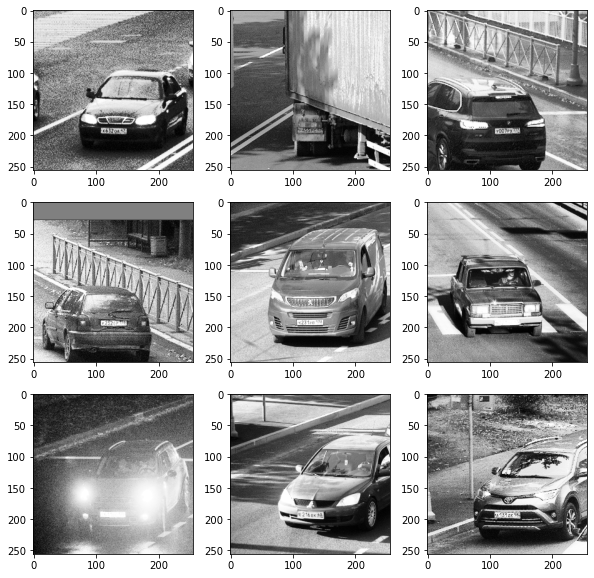

In [4]:
N_COLS = 3
N_ROWS = 3
fig = plt.figure(figsize=(10, 10))
grs = gs.GridSpec(N_ROWS, N_COLS, figure=fig)

images = []
for fld_n in rnd_folders:
    imgs_loc_path = os.path.join(init_dataset_path, fld_n)
    imgs_paths = os.listdir(imgs_loc_path)
    img_p = os.path.join(imgs_loc_path, random.choice(imgs_paths))
    images.append(img_p)
    
axs = []
for i in range(N_COLS*N_ROWS):
    axs.append(fig.add_subplot(grs[i]))
    axs[-1].imshow(Image.open(images[i]), 'gray')

plt.show()

Исходя из наименованя папок считается, что марка автомобиля $-$ это первое слово наименования папки, модель $-$ второе.

### 1.2. Анализ

In [5]:
folders = os.listdir(init_dataset_path)
indexes = indexing.get_indexes(folders)

In [6]:
indexes[0]

('1804_truck', 'WR', 'normal', 'truck')

In [7]:
def marks_indx_f(x):
    return (x[0],)

def models_indx_f(x):
    return (x[0], x[1])

**Марки**

In [8]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data

In [9]:
print(f'Общее число марок: {len(marks_uniqie)}')

Общее число марок: 156


In [10]:
marks_hist_data = prepr_hst.get_hist_data(init_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)

  0%|          | 0/6151 [00:00<?, ?it/s]

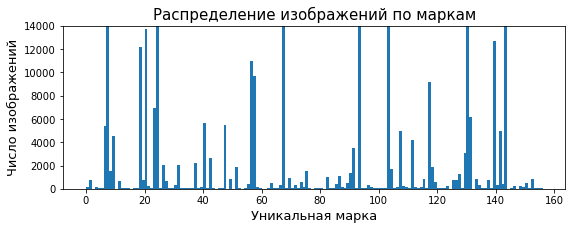

In [11]:
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie,
                    title, xlabel, ylim=(0, 14000))

**Модели**

In [12]:
models_unique_data = prepr_hst.get_unique(indexes, models_indx_f)
models_t_indxs, models_uniqie, models_code_in = models_unique_data

In [13]:
print(f'Общее число моделей: {len(models_uniqie)}')

Общее число моделей: 1049


In [14]:
models_hist_data = prepr_hst.get_hist_data(init_dataset_path, folders,
                                           models_t_indxs, models_code_in)

  0%|          | 0/6151 [00:00<?, ?it/s]

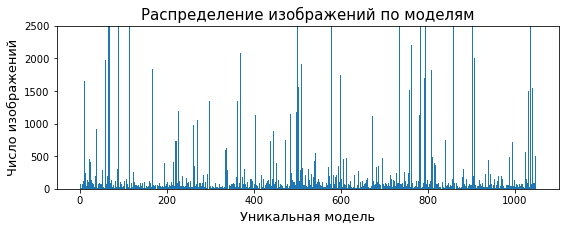

In [15]:
title = 'Распределение изображений по моделям'
xlabel = 'Уникальная модель'
prepr_hst.plot_hist(models_hist_data, models_uniqie,
                    title, xlabel, ylim=(0, 2500))

**Определение параметров нормализации изображений**

In [16]:
s='''
m, s = norm.get_normalize_params(train_dataset_path)
print(f'mean: {round(m, 3)}')
print(f'std: {round(s, 3)}')
'''

Вычисленные в последний раз:  
mean: $0,512$  
std: $0,272$

## 2. Семплирование исходной выборки для построения тренировочной

Исходная выборка сильно несбалансирована по числу изображений как по маркам, так и по моделям. Для построения тренировочной выборки будут отобраны марки, число изображений которых больше $1000$. Также ограничим число изображений сверху двумя тысячами.

In [17]:
datasets_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data'
init_dataset_path = os.path.join(datasets_path, '015_model_marka_year_train')

**Марки**

In [18]:
output_folder_name = 'sampled_train_marks'
s='''
_ = sampling.sample_data(init_dataset_path, datasets_path,
                         marks_indx_f, output_folder_name,
                         min_th=1000, max_th=2000, random_state=0)
'''

In [19]:
train_dataset_path = os.path.join(datasets_path, output_folder_name)

folders = os.listdir(train_dataset_path)
indexes = indexing.get_indexes(folders)

In [20]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data

In [21]:
print(f'Число марок: {len(marks_uniqie)}')

36


In [22]:
marks_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)

  0%|          | 0/4962 [00:00<?, ?it/s]

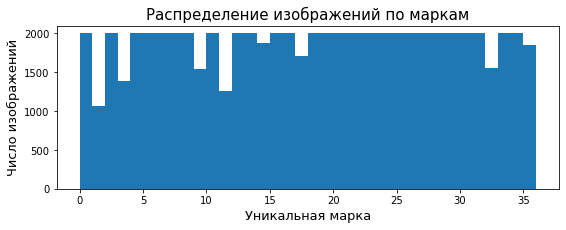

In [23]:
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie, title, xlabel)

**Модели**

In [24]:
models_unique_data = prepr_hst.get_unique(indexes, models_indx_f)
models_t_indxs, models_uniqie, models_code_in = models_unique_data

In [25]:
print(f'Число моделей: {len(models_uniqie)}')

744


In [26]:
models_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                           models_t_indxs, models_code_in)

  0%|          | 0/4962 [00:00<?, ?it/s]

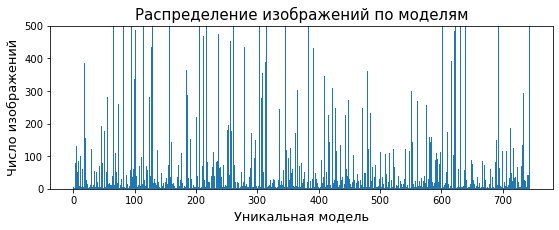

In [27]:
title = 'Распределение изображений по моделям'
xlabel = 'Уникальная модель'
prepr_hst.plot_hist(models_hist_data, models_uniqie, title,
                    xlabel, ylim=(0, 500))

До сих пор осталось достаточно большое колчество моделей, изображения в которых распределены сильно неравномерно. Отсеим часть моделей, рассмотрев распределение по числу изображений.

  0%|          | 0/4962 [00:00<?, ?it/s]

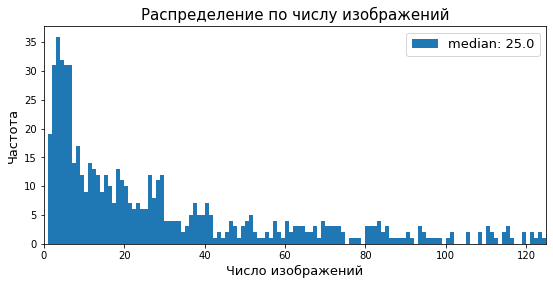

In [28]:
sampling.imgs_distr(train_dataset_path, models_indx_f, xlim=(0, 125))

Достаточно много моделей имеют меньше $7$-$10$ изображений. Ограничим модели данным нижним порогом, а также ограничим сверху числом $100$, так как после этой границы числа становятся существенно разреженными и лишь небольшое число моделей с аномально большим числом изображений преодолевают данный порог.

In [29]:
output_folder_name = 'sampled_train_marks_models'
s='''
_ = sampling.sample_data(train_dataset_path, datasets_path,
                         models_indx_f, output_folder_name,
                         min_th=10, max_th=100, random_state=0)
'''

**Итоговые результаты семплирования тренировочного датасета**

In [30]:
final_fold = 'sampled_train_marks_models'
train_dataset_path = os.path.join(datasets_path, final_fold)

folders = os.listdir(train_dataset_path)
indexes = indexing.get_indexes(folders)

Марки:

Число марок: 36


  0%|          | 0/4102 [00:00<?, ?it/s]

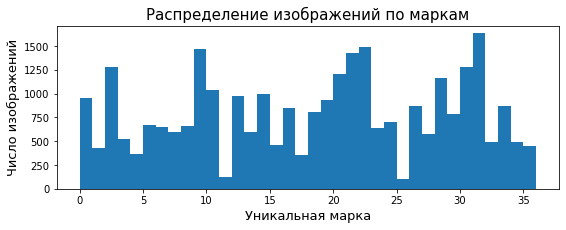

In [31]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data
print(f'Число марок: {len(marks_uniqie)}')
marks_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie, title, xlabel)

Две марки существенно ниже остальных по числу изображений. Данные марки являются разреженными по моделям $-$ имеют большое число моделей и небольшое количество изображений на модель. Отбросим данные марки из тренировочного набора данных.

In [32]:
# _ = sampling.filter_objects_by_th(train_dataset_path, marks_indx_f, 200)

  0%|          | 0/4102 [00:00<?, ?it/s]

Following objects will be deleted from the dataset. Delete? [y/n] 
  ('LAND',): 100 imgs
  ('SITROEN_truck',): 121 imgs
y
Object "('LAND',)" has been deleted from dataset.
Object "('SITROEN_truck',)" has been deleted from dataset.


In [33]:
folders = os.listdir(train_dataset_path)
indexes = indexing.get_indexes(folders)

Число марок: 34


  0%|          | 0/4028 [00:00<?, ?it/s]

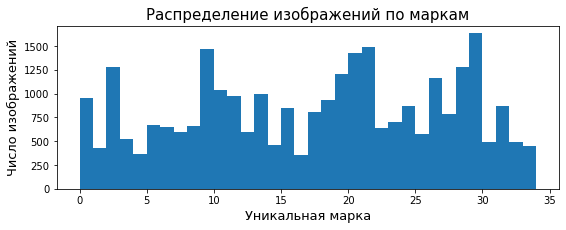

In [34]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data
print(f'Число марок: {len(marks_uniqie)}')
marks_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie, title, xlabel)

Модели:

Число моделей: 509


  0%|          | 0/4028 [00:00<?, ?it/s]

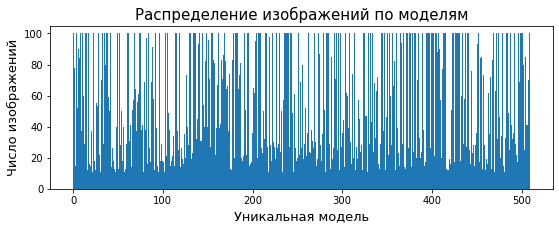

In [35]:
models_unique_data = prepr_hst.get_unique(indexes, models_indx_f)
models_t_indxs, models_uniqie, models_code_in = models_unique_data
print(f'Число моделей: {len(models_uniqie)}')
models_hist_data = prepr_hst.get_hist_data(train_dataset_path, folders,
                                           models_t_indxs, models_code_in)
title = 'Распределение изображений по моделям'
xlabel = 'Уникальная модель'
prepr_hst.plot_hist(models_hist_data, models_uniqie, title, xlabel)

## 3. Построение тестовой выборки

Тестовую выборку сформируем на основе тренировочной. Возьмем фиксированное количество изображений из каждой мароки. Также добавим три марки, которые не входят в обучающую выборку. Эти три марки необходимы для оценки способности определения новых объектов в системе.

In [ ]:
# это в dataset/sampling:
def get_test_ds_from_train(train_ds_path: str):
    

In [1]:
test_dataset_path = 'G:\\diplom\\project\\triplet_loss_project_2_06.04\\data\\015_model_marka_year_test'

In [27]:
folders = os.listdir(test_dataset_path)
indexes = indexing.get_indexes(folders)

**Марки**

In [28]:
mark_unique_data = prepr_hst.get_unique(indexes, marks_indx_f)
marks_t_indxs, marks_uniqie, marks_code_in = mark_unique_data

In [29]:
print(len(marks_uniqie))

22


In [30]:
marks_hist_data = prepr_hst.get_hist_data(test_dataset_path, folders,
                                          marks_t_indxs, marks_code_in)

  0%|          | 0/541 [00:00<?, ?it/s]

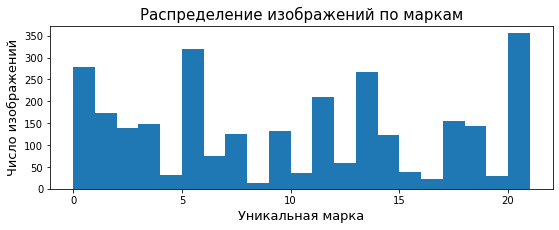

In [31]:
title = 'Распределение изображений по маркам'
xlabel = 'Уникальная марка'
prepr_hst.plot_hist(marks_hist_data, marks_uniqie, title, xlabel)

**Модели**

In [32]:
models_unique_data = prepr_hst.get_unique(indexes, models_indx_f)
models_t_indxs, models_uniqie, models_code_in = models_unique_data

In [33]:
print(len(models_uniqie))

82


In [34]:
models_hist_data = prepr_hst.get_hist_data(test_dataset_path, folders,
                                           models_t_indxs, models_code_in)

  0%|          | 0/541 [00:00<?, ?it/s]

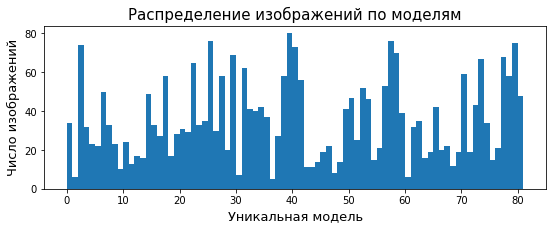

In [35]:
title = 'Распределение изображений по моделям'
xlabel = 'Уникальная модель'
prepr_hst.plot_hist(models_hist_data, models_uniqie, title, xlabel)

Ввиду существеной неравномерности тестовой выборки как по маркам, так и по моделям, в качестве критерия качества будет использоваться **AUC**.